# Masking Data Land-Sea Masks (Beginner)<a id='top' class="tocSkip"> </a>

In this example we will show simple examples on how to generate land and sea masks.


The CDAT software was developed by LLNL. This tutorial was written by Jiwoo Lee with Carlos Downie. This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

[Download the Jupyter Notebook](Masking_Data_Land-Sea_Beginner.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-Notebook" data-toc-modified-id="Preparing-the-Notebook-1">Preparing the Notebook</a></span></li><li><span><a href="#Generate-Mask-(0:-ocean,-1:-land)" data-toc-modified-id="Generate-Mask-(0:-ocean,-1: land)">Generate Mask</a></span></li><li><span><a href="#Match-Dimension" data-toc-modified-id="Match-Dimension">Match Dimension</a></span><li><span><a href="#Ocean-grid-(mask-out-land-area)" data-toc-modified-id="Ocean-grid-(mask-out-land-area)">Ocean grid (mask out land area)</a></span></li><li><span><a href="#Land-grid-(mask-out-ocean-area)" data-toc-modified-id="Land-grid-(mask-out-ocean-area)">Land grid (mask out ocean area)</a></span></li></li></ul></div>

## Preparing the Notebook
[Back to Top](#top)

In [6]:
import cdms2
import vcs
import cdutil
import MV2
import genutil

In [10]:
# Download data
import requests
r = requests.get("https://cdat.llnl.gov/cdat/sample_data/clt.nc",stream=True)
with open("clt.nc","wb") as f:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:  # filter local_filename keep-alive new chunks
            f.write(chunk)

# Load the data
f = cdms2.open('clt.nc')
d = f('clt') # Get the 'clt' variable

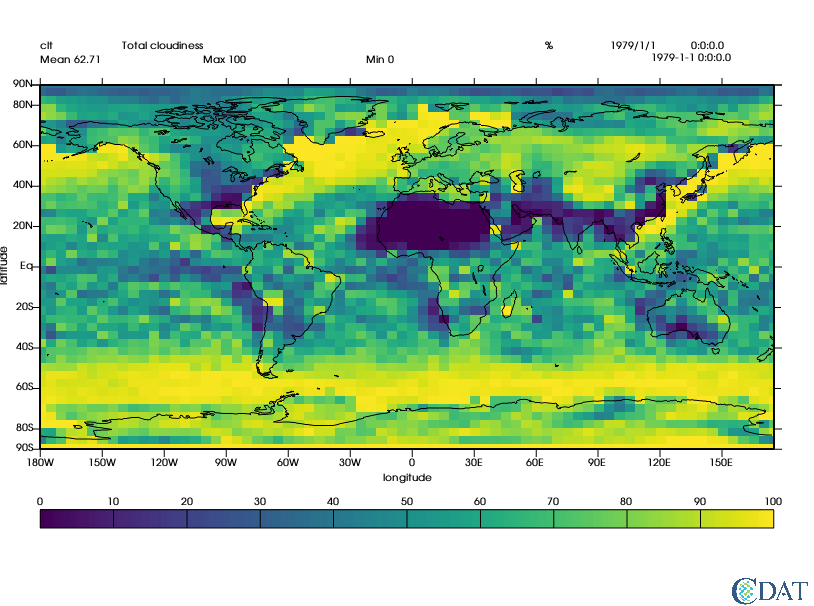

In [11]:
# Prepare graphics and generate initial plot
x = vcs.init()
x.clear()
x.plot(d)

## Generate Mask (0: ocean, 1: land)

In [12]:
# Call the cdutil function to generate a mask, 0 for ocean, 1 for land.
mask = cdutil.generateLandSeaMask(d) 

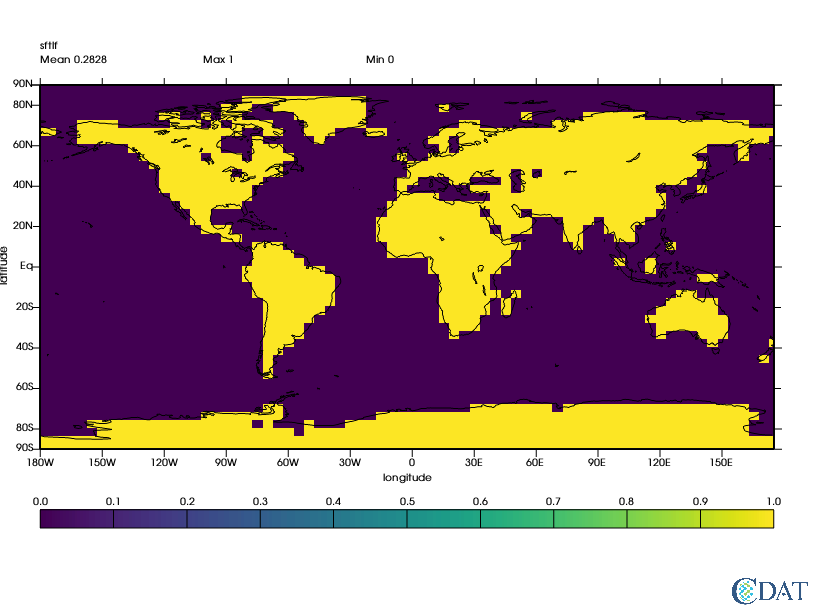

In [13]:
x.clear()
x.plot(mask)

## Match Dimension

In [15]:
# Match dimension using "grower" function
d, mask2 = genutil.grower(d, mask)
print(mask2.shape)

(120, 46, 72)


## Ocean grid (mask out land area)

In [16]:
d_ocean = MV2.masked_where(mask2, d)  # Or MV2.masked_where(mask2==1., d)"

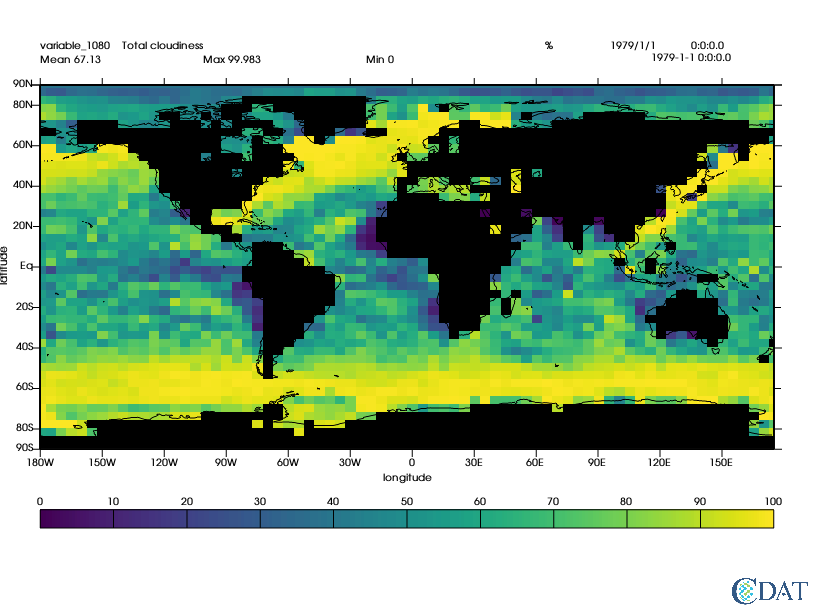

In [17]:
x.clear()
x.plot(d_ocean)

## Land grid (mask out ocean area)

In [18]:
d_land = MV2.masked_where(mask2==0., d) # Setting mask2==0 will mask out ocean

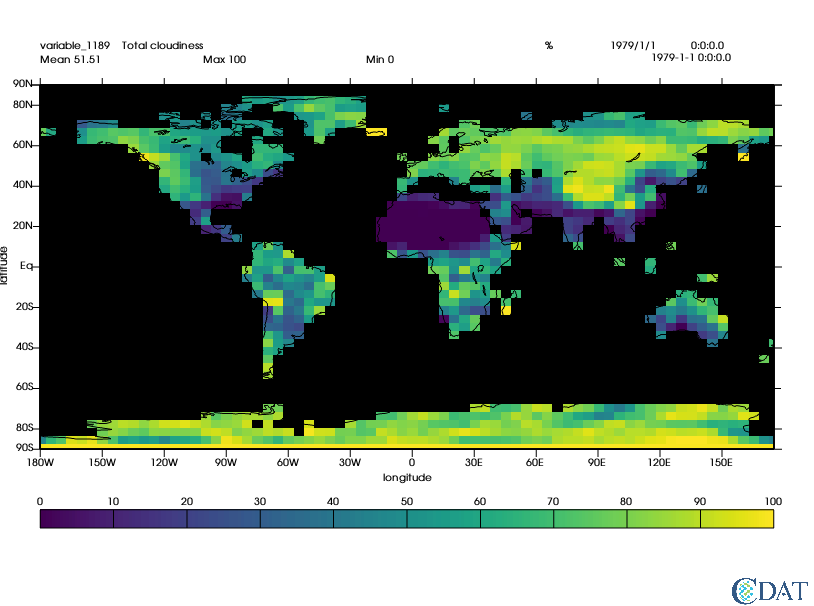

In [19]:
x.clear()
x.plot(d_land)